2.Lorenz Attractors: In 1961, Edward Lorenz was using a simplified atmospheric convection model to predict weather patterns, when, as a shortcut, he entered the decimal 0.506 instead of entering the full 0.506 127 for a parameter in the model. The results for the two numbers were so different that at first he thought it to be a numerical error, but in time he realized that this was a nonlinear system with chaotic behavior. Now we want you to repeat this discovery. (Landau 379)

The equation used by Lorenz are
\begin{eqnarray}
dx/dt = \sigma(y-x)\\
dy/dt = x(\rho-z)-y\\
dz/dt = -\beta z+ xy\\
\end{eqnarray}

where x(t) is a measure of fluid velocity as a function of time t, y(t) and z(t) are measures of the temperature distributions in two directions, and $\sigma$, $\rho$, and $\beta$ are parameters. Note that the xz and xy terms make these equations nonlinear.

a) Modify your RK4 solver to solve these equations. 
Choose $\sigma=10$, $\rho=28$, and $\beta=8/3$, and the initial x,y,z are all  1. Integrate t to t=40. 

b) Integrate a short period of time (e.g. t=1) with different dt. Show the results converge to some values.  Plot the error with respect to dt. How fast the integrator converges? 

c) Make plots of x vs t, y vs t, and z vs t

d) Do a Fourier analysis for x vs t (run the code for a longer t=200). 

d) Make a “phase-space” plot of z(t) vs. x(t) (the independent variable t does not appear in such a plot).

e) The parameters given to you should lead to chaotic solutions. Start with two x values which are very close to each other, and show that they eventually diverges after some time. 


Streaming output truncated to the last 5000 lines.

X =  -3.980373954786567    Y =  -2.2447248637045742    Z =  24.733318843263827 

X =  -3.8206615328713127    Y =  -2.3599934005270793    Z =  24.170983369799444 

X =  -3.6878243362183563    Y =  -2.489662490284916    Z =  23.624667566363268 

X =  -3.5806172748676777    Y =  -2.6326061873990616    Z =  23.094751045052124 

X =  -3.4978270695063767    Y =  -2.788113227986361    Z =  22.581595491139858 

X =  -3.438306221036041    Y =  -2.955836600750126    Z =  22.085575922319137 

X =  -3.400999122675704    Y =  -3.135746845634235    Z =  21.60710616012685 

X =  -3.384961445213925    Y =  -3.328089574123459    Z =  21.146660517348494 

X =  -3.3893738419801442    Y =  -3.5333472421942154    Z =  20.70479331275561 

X =  -3.4135509058524693    Y =  -3.7522048589724006    Z =  20.282157488251972 

X =  -3.4569461783471724    Y =  -3.9855190485823697    Z =  19.87952332449951 

X =  -3.5191538687553323    Y =  -4.234289672600467    Z =

<function matplotlib.pyplot.show>

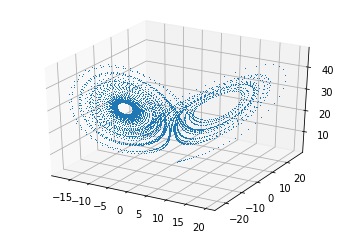

In [16]:
#Part a)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp = [1] #initalized at 1
yp = [1]
zp = [1]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h
    i += 1

    print("X = ", step[0], "   Y = ", step[1], "   Z = ", step[2], "\n")


#plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

x_array = np.array(xp)
y_array = np.array(yp)
z_array = np.array(zp)

ax.plot(x_array, y_array, z_array, ',')

plt.show

Streaming output truncated to the last 5000 lines.

X =  -9.403743627331908    Y =  -8.409925608008567    Z =  29.36124488110948 

X =  -9.403733689095352    Y =  -8.409904397298748    Z =  29.36124566909824 

X =  -9.403723750746073    Y =  -8.409883186616259    Z =  29.361246456801855 

X =  -9.40371381228407    Y =  -8.409861975961103    Z =  29.36124724422033 

X =  -9.403703873709347    Y =  -8.409840765333284    Z =  29.361248031353664 

X =  -9.403693935021904    Y =  -8.409819554732803    Z =  29.36124881820186 

X =  -9.403683996221742    Y =  -8.409798344159663    Z =  29.361249604764918 

X =  -9.403674057308864    Y =  -8.409777133613868    Z =  29.361250391042837 

X =  -9.40366411828327    Y =  -8.409755923095421    Z =  29.36125117703562 

X =  -9.403654179144961    Y =  -8.409734712604324    Z =  29.361251962743264 

X =  -9.40364423989394    Y =  -8.40971350214058    Z =  29.36125274816577 

X =  -9.403634300530205    Y =  -8.409692291704191    Z =  29.36125353330314 


<function matplotlib.pyplot.show>

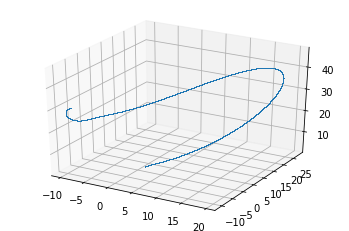

In [15]:
#part b)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp = [1] #initalized at 1
yp = [1]
zp = [1]

t = 0
h = 1e-6
i = 0
tend = 1

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h
    i += 1
    print("X = ", step[0], "   Y = ", step[1], "   Z = ", step[2], "\n")

#plot
fig = plt.figure()
ax = fig.gca(projection = '3d')

x_array = np.array(xp)
y_array = np.array(yp)
z_array = np.array(zp)

ax.plot(x_array, y_array, z_array, ',')

plt.show

In [19]:
#part b) error
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ha=[]
err=[]
for h in 10.**np.arange(0.,-4.2,-0.2):
    #Initialize
    sigma, rho, beta = 10, 28, 8/3

    xp = [1] #initalized at 1
    yp = [1]
    zp = [1]

    t = 0
    h = 1e-3
    i = 0
    tend = 1
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        x = xp[i]
        y = yp[i]
        z = zp[i]
        step = RK4(x, y, z, sigma, rho, beta, h)
        xp.append(step[0])
        yp.append(step[1])
        zp.append(step[2])
        t = t+h
        i += 1
    err=np.append(abs(xp-1.))

plt.plot(ha,err)
plt.xscale('log')
plt.yscale('log')
plt.show()

TypeError: ignored

<Figure size 432x288 with 0 Axes>

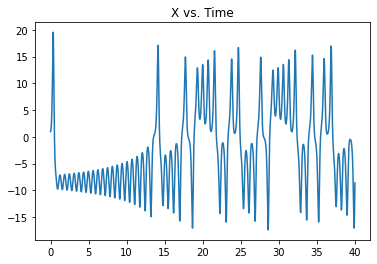

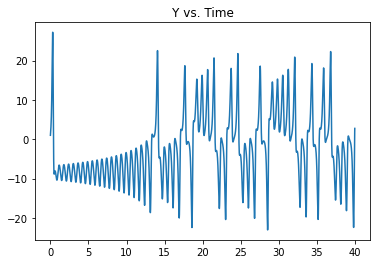

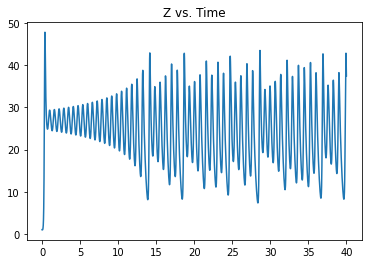

In [28]:
#part c)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp = [1] #initalized at 1
yp = [1]
zp = [1]
time = [0]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h

    time.append(t)

    i += 1


#plot
plt.title('X vs. Time')
plt.plot(time,xp)
plt.show()

plt.title('Y vs. Time')
plt.plot(time,yp)
plt.show()

plt.title('Z vs. Time')
plt.plot(time,zp)
plt.show()

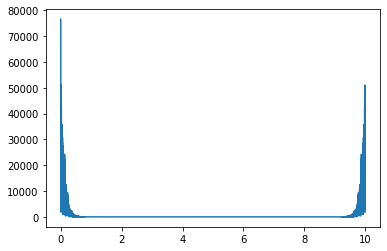

In [16]:
# part d)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp = [1] #initalized at 1
yp = [1]
zp = [1]
time = [0]

t = 0
h = 0.01
i = 0
tend = 200

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h

    time.append(t)

    i += 1



# Fourier analysis

N=len(xp)
dftz=np.zeros(N,complex )
nplot=np.zeros(N)
fplot=np.zeros(N)
step1 = 0.1

def fourier(signal):                                              # DFT
    for n in range(0, N):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, 2.*np.pi*k*n/N)           # Complex exponent
          zsum += signal[k]*np.exp(-zexpo)           
      dftz[n] = zsum * np.sqrt(2.*np.pi)      
      nplot[n] = n/N/step1
      fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
    
fourier(xp)

plt.plot(nplot,fplot)
plt.show()

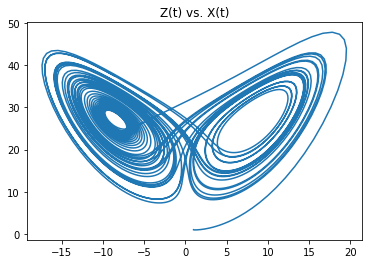

In [18]:
#part e)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp = [1] #initalized at 1
yp = [1]
zp = [1]
time = [0]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h

    time.append(t)

    i += 1


#plot
plt.title('Z(t) vs. X(t)')
plt.plot(xp,zp)
plt.show()


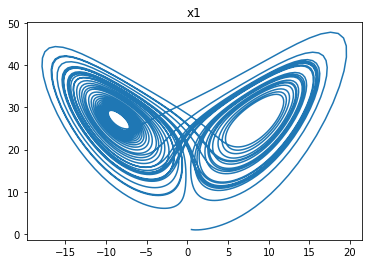

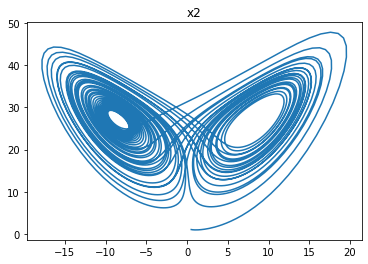

In [25]:
#part f)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp1 = [0.506127] #initalized at 1
yp = [1]
zp = [1]
time = [0]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp1[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp1.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h

    time.append(t)
    i += 1

plt.title('x1')
plt.plot(xp1,zp)
plt.show()

xp2 = [0.506] #initalized at 1.0001
yp = [1]
zp = [1]
time = [0]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp2[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp2.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h

    time.append(t)

    i += 1




#plot
plt.title('x2')
plt.plot(xp2,zp)
plt.show()



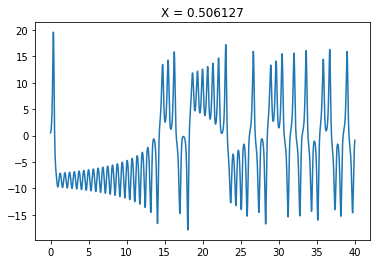

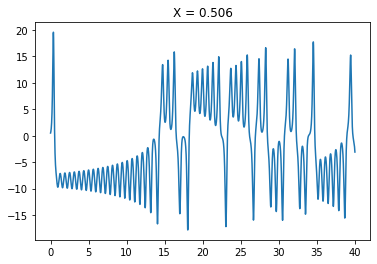

In [28]:
#part f)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#define equations
def X(x, y, sigma):
    return sigma * (y - x)

def Y(x, y, z, rho):
    return (-x) * z + rho * x - y

def Z(x, y, z, beta):
    return x * y - beta * z

#RK4 for the differential equations
def RK4(x, y, z, sigma, rho, beta, h):
    k1x = X(x, y, sigma)
    k1y = Y(x, y, z, rho)
    k1z = Z(x, y, z, beta)

    k2x = X((x + k1x*h*0.5), (y + k1y*h*0.5), sigma)
    k2y = Y((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), rho)
    k2z = Z((x + k1x*h*0.5), (y + k1y*h*0.5), (z + k1z*h*0.5), beta)

    k3x = X((x + k2x*h*0.5), (y + k2y*h*0.5), sigma)
    k3y = Y((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), rho)
    k3z = Z((x + k2x*h*0.5), (y + k2y*h*0.5), (z + k2z*h*0.5), beta)

    k4x = X((x + k3x*h), (y + k3y*h), sigma)
    k4y = Y((x + k3x*h), (y + k3y*h), (z + k3z*h), rho)
    k4z = Z((x + k3x*h), (y + k3y*h), (z + k3z*h), beta)

    x += (k1x + 2*k2x + 2*k3x + k4x) * h*(1/6)
    y += (k1y + 2*k2y + 2*k3y + k4y) * h*(1/6)
    z += (k1z + 2*k2z + 2*k3z + k4z) * h*(1/6)

    return (x, y, z)

#Initialize
sigma, rho, beta = 10, 28, 8/3

xp = [0.506127] #initalized at 0.506127
yp = [1]
zp = [1]
time = [0]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp[i]
    y = yp[i]
    z = zp[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp.append(step[0])
    yp.append(step[1])
    zp.append(step[2])
    t = t+h

    time.append(t)

    i += 1


#plot
plt.title('X = 0.506127')
plt.plot(time,xp)
plt.show()


xp2 = [0.506] #initalized at 0.506
yp2 = [1]
zp2 = [1]
time2 = [0]

t = 0
h = 0.01
i = 0
tend = 40

#looping
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    x = xp2[i]
    y = yp2[i]
    z = zp2[i]
    step = RK4(x, y, z, sigma, rho, beta, h)
    xp2.append(step[0])
    yp2.append(step[1])
    zp2.append(step[2])
    t = t+h

    time2.append(t)

    i += 1


#plot
plt.title('X = 0.506')
plt.plot(time2,xp2)
plt.show()